# Setup

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns

# seeding to ensure everyone has the same data
np.random.seed(1)

In [146]:
# Creating a random dataframe with 1000 rows. 
# column a is normally distributed about a mean of 50 with an sd of 10
# column b is uniformly distributed on the interval [0, 100]

random_data = pd.DataFrame({'a': np.random.normal(50, 10, 1000), 'b': np.random.randint(0, 100, 1000)})
random_data.head()

,a,b
0,66.243454,98
1,43.882436,8
2,44.718282,89
3,39.270314,27
4,58.654076,29


In [147]:
random_data.describe()

,a,b
count,1000.000000,1000.000000
mean,50.388125,50.070000
std,9.814950,28.791041
min,19.462356,0.000000
25%,43.998396,25.000000
50%,50.412926,52.000000
75%,57.039989,75.000000
max,89.586027,99.000000


In [148]:
random_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       1000 non-null   float64
 1   b       1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>]],
      dtype=object)

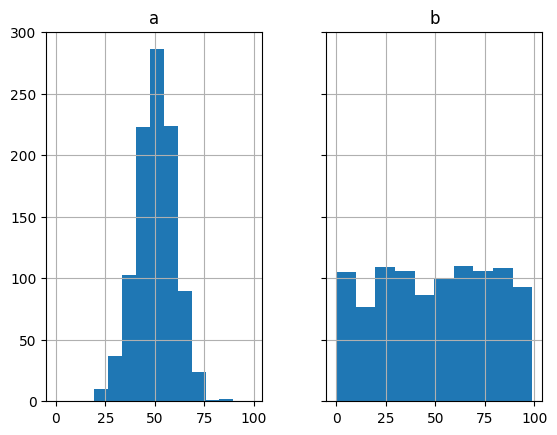

In [149]:
random_data.hist(sharex=True, sharey=True)

# `pd.cut`

[Pandas `pd.cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) is a function that takes a series of values and breaks it up into some specified number of **equal-size** categories based on the range of the series, optionally labeling each category.

For example consider the following toy dataframe:

In [150]:
df = pd.DataFrame({'x': [1, 2, 3, 4, 100]})
df

,x
0,1
1,2
2,3
3,4
4,100


We see the values of x range from 1 to 100. If we were to cut this range into five equal-sized categories, we expect each category to be 20 'units' wide. 

In [151]:

# Setting the number of bins to 5
labels = pd.cut(df['x'], bins=5)

labels

0    (0.901, 20.8]
1    (0.901, 20.8]
2    (0.901, 20.8]
3    (0.901, 20.8]
4    (80.2, 100.0]
Name: x, dtype: category
Categories (5, interval[float64, right]): [(0.901, 20.8] < (20.8, 40.6] < (40.6, 60.4] < (60.4, 80.2] < (80.2, 100.0]]

We see we get back a series of values where each value represents the interval that data point was "binned" into. Note that each bin *is not* exactly 20 units wide, since "the range of x is extended by .1% on each side to include the minimum and maximum values of x" [(source)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html#pandas-cut)

In this example, the first four points are placed into the bin starting at 0.901 and ending at 20.8, while the last point goes into the bin starting at 80.2 and ending at 100.0.

We can also optionally pass `pd.cut` a list of labels for the bins:

In [152]:
pd.cut(df['x'], bins=3, labels=['low', 'medium', 'high'])

0     low
1     low
2     low
3     low
4    high
Name: x, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

`pd.cut` can be used to cast numerical data as *categorical* data. Here we'll use the `random_data` from the beginning of the notebook:

In [153]:
a_categories = pd.cut(random_data['a'], bins=3, labels=['low', 'mid', 'high'])
a_categories

0      high
1       mid
2       mid
3       low
4       mid
       ... 
995     mid
996     low
997     mid
998     mid
999     mid
Name: a, Length: 1000, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']

Then we can attach this new data to the original dataframe by adding a column:

In [154]:
random_data['a_rank'] = a_categories
random_data.head()

,a,b,a_rank
0,66.243454,98,high
1,43.882436,8,mid
2,44.718282,89,mid
3,39.270314,27,low
4,58.654076,29,mid


In [155]:
random_data['a_rank'].value_counts()

a_rank
mid     736
low     211
high     53
Name: count, dtype: int64

Unsurprisingly for a normal ("bell-shaped") distribution we see that most of our values fall in the 'mid' category. Repeating the same process for column 'b':

In [156]:
random_data['b_rank'] = pd.cut(random_data['b'], bins=3, labels=['low', 'mid', 'high'])
random_data['b_rank'].value_counts()

b_rank
high    343
mid     329
low     328
Name: count, dtype: int64

Here we see that the counts are roughly the same across categories as expected for a uniform ("flat") distribution.

# `pd.qcut`

[Pandas `pd.qcut`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html#pandas-qcut) functions similarly to `pd.cut`, only it bins the data based on the *distribution* of the values rather than the range. Instead of cutting the series into bins of equal size, `pd.qcut` does its best to ensure that each bin gets roughly the same number of data points. In other words, `pd.qcut` categorizes by [*quantile*](https://en.wikipedia.org/wiki/Quantile).

Using `pd.qcut` is very similar to using `pd.cut`, only instead of the `bins=` argument, we pass an integer with the `q=` argument. Here's a quick reminder of what our toy dataframe looked like

In [157]:
df

,x
0,1
1,2
2,3
3,4
4,100


Now let's use `pd.qcut` with 5 quantiles:

In [158]:
pd.qcut(df['x'], q=5)

0     (0.999, 1.8]
1       (1.8, 2.6]
2       (2.6, 3.4]
3      (3.4, 23.2]
4    (23.2, 100.0]
Name: x, dtype: category
Categories (5, interval[float64, right]): [(0.999, 1.8] < (1.8, 2.6] < (2.6, 3.4] < (3.4, 23.2] < (23.2, 100.0]]

Unsurprisingly, since each data point is unique and there are just as many bins as data points, we get one point assigned to each bin. Note how the size of each bin is *no longer constant*!

Let's see how this behaves on the larger, randomized dataframe:

In [159]:
pd.qcut(random_data['a'], q=5).value_counts()

a
(19.461, 42.439]    200
(42.439, 48.081]    200
(48.081, 53.153]    200
(53.153, 58.546]    200
(58.546, 89.586]    200
Name: count, dtype: int64

In [160]:
pd.qcut(random_data['b'], q=5).value_counts()

b
(21.8, 40.0]      206
(61.0, 80.0]      204
(-0.001, 21.8]    200
(40.0, 61.0]      200
(80.0, 99.0]      190
Name: count, dtype: int64

Even though the underlying distributions are different, we get roughly the same number of data points *per bin*. However, notice how the *size* of the bins varies with the underlying distribution!